In [1]:
# importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from scipy.stats import ttest_ind

# Loading the csv files
customer = pd.read_csv('Customer_churn.csv')

# Creating a copy of the original dataset
customer_ch = customer
display(customer_ch.head(10))

# Ensuring the data types are correct (e.g., CustomerId should be a string since it won't be used for calculations).
customer_ch['CustomerId'] = customer_ch['CustomerId'].astype(str) 

# Checking the info
customer_ch.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Mal,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10005 non-null  int64  
 1   CustomerId          10005 non-null  object 
 2   Surname             10005 non-null  object 
 3   CreditScore         10005 non-null  int64  
 4   Geography           10005 non-null  object 
 5   Gender              10005 non-null  object 
 6   Age                 10005 non-null  int64  
 7   Tenure              10005 non-null  int64  
 8   Balance             10005 non-null  float64
 9   NumOfProducts       10005 non-null  int64  
 10  HasCrCard           10005 non-null  int64  
 11  IsActiveMember      10005 non-null  int64  
 12  EstimatedSalary     10005 non-null  float64
 13  Exited              10005 non-null  int64  
 14  Complain            10005 non-null  int64  
 15  Satisfaction Score  10005 non-null  int64  
 16  Card

### Key Observations:
- The dataset contains **18 columns** and **10,005 entries**.
- The `CustomerId` column is stored as an **object** type.
- Numerical columns include `CreditScore`, `Age`, `Balance`, and `PointEarned`, among others.
- There are no missing values, as all columns have **10,005 non-null** entries.
- The data types (`dtypes`) are a mix of integers (`int64`), floating-point numbers (`float64`), and categorical (`object`).

### Analysis Note:
The dataset structure is in order, and modifying the `CustomerId` datatype is necessary for the analysis.


## Checking for any duplicate records and remove them appropriately.

In [2]:
# Checking for any duplicates
customer_ch = customer_ch.drop_duplicates().copy()

## Dataset Overview and Duplicate Values
The dataset contains a total of **10,005** records. Upon inspection, I found that there were **5** duplicated rows. To ensure data integrity and avoid any potential biases in analysis, I decided to drop these duplicate rows.

 ## Checking for missing values and handling them appropriately.

<Axes: >

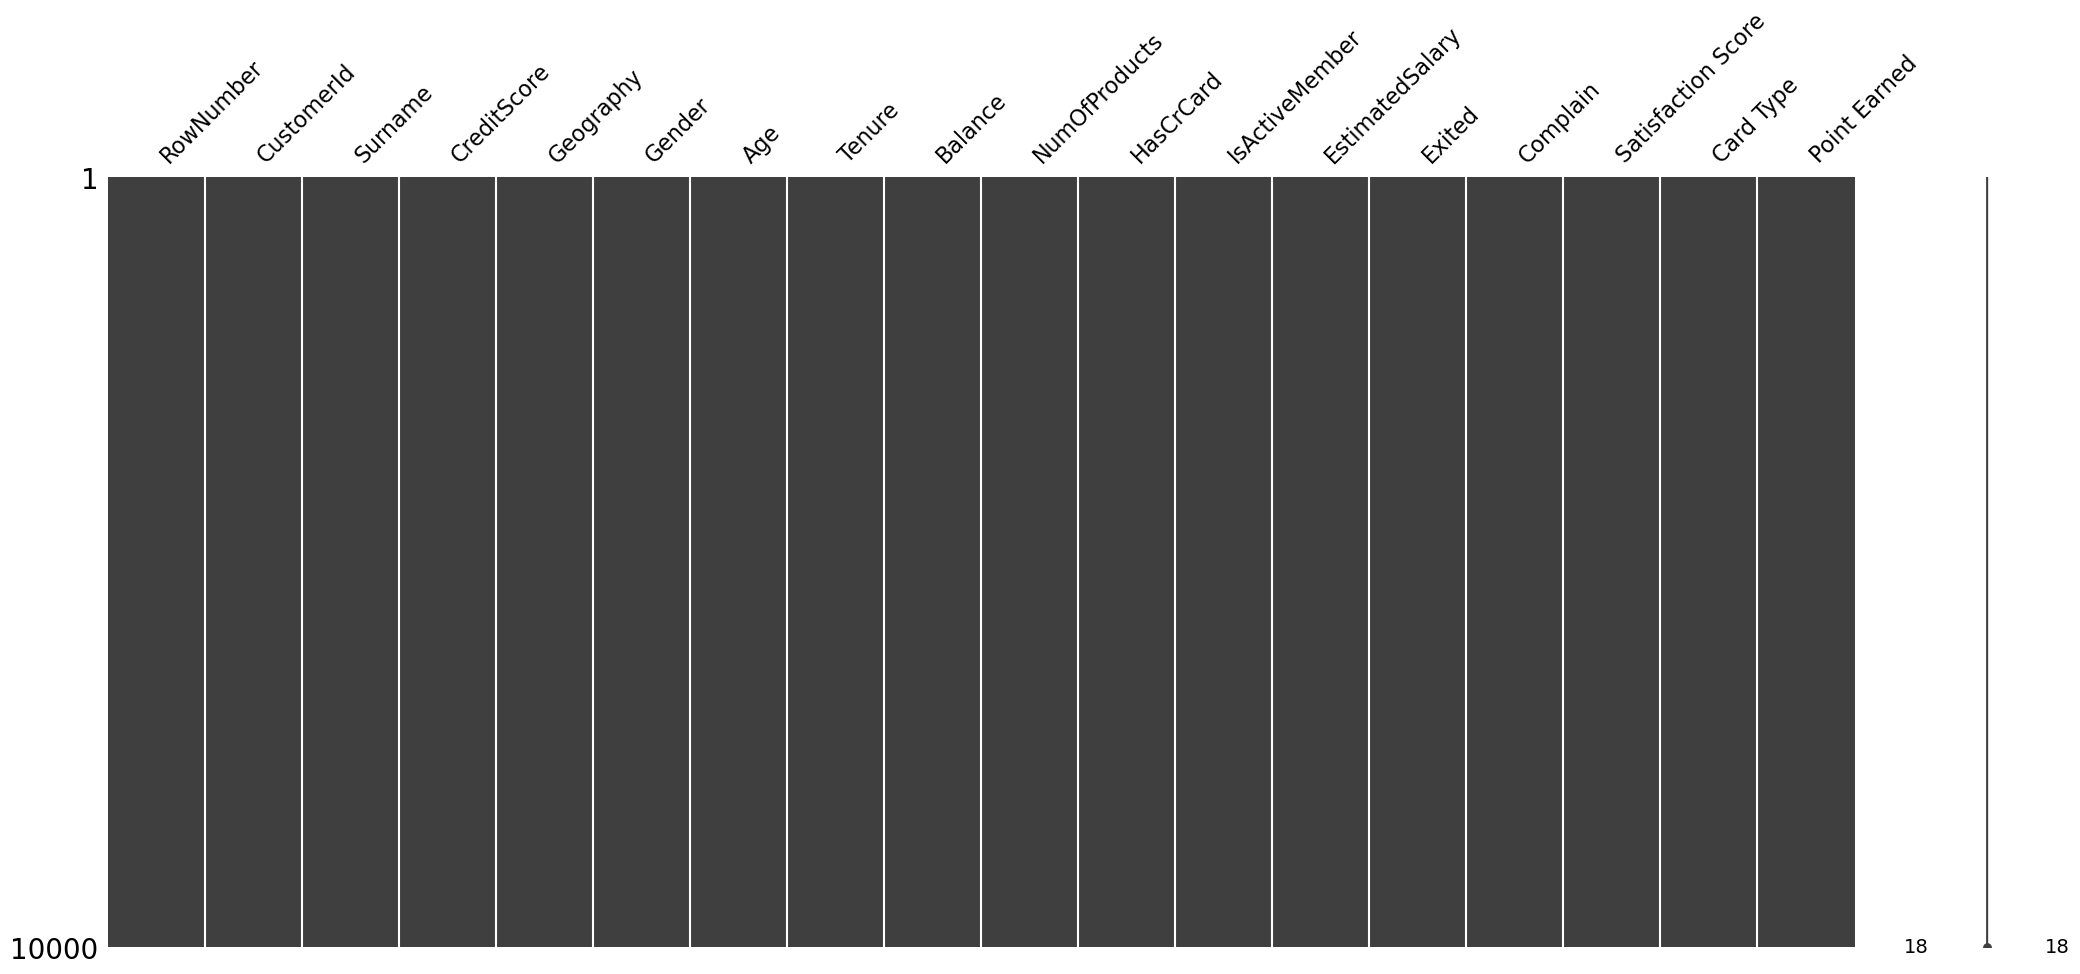

In [3]:
# Checking for missing values/NaN in the customer_ch data
msno.matrix(customer_ch)

The matrix confirms that the dataset customer_ch has no missing values or NaNs. However, this does not rule out potential typos and inconsistencies in the data. To address this, I performed data validation, as shown in the code cell below.

## Validating categorical data in Geography and Gender (remove typos, extra spaces, etc.).

In [4]:
# Validating my dataset customer_ch
customer_ch['Geography'].unique()  # the Geography column suppose to have 3 unique values but it's output resulted to 14 output
customer_ch['Gender'].unique()     # Same with the Gender column, instead of 2 we are getting 5

# Removing all the whitespace in the column Geography
customer_ch['Geography'] = customer_ch['Geography'].str.strip() 
customer_ch['Gender'] = customer_ch['Gender'].str.strip()

# Replacing the typos with the appropriate values
customer_ch['Geography'] = customer_ch['Geography'].replace(
    {'france' : 'France', 
     'jermany' : 'Germany', 
     'spain' : 'Spain', 
     'pain' : 'Spain', 
     'drance' : 'France'}
)
customer_ch['Gender'] = customer_ch['Gender'].replace(
    {'Mal' : 'Male', 
     'M ale' : 'Male', 
     'Femal' : 'Female'}
)

# Checking the unique value_count of the Geography and Gender column
Geo_count = customer_ch['Geography'].value_counts()
print(Geo_count)
Gen_count = customer_ch['Gender'].value_counts()
print(Gen_count)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


All typos in the dataset have been corrected. 
## Now, it's time to analyze the dataset.

In [5]:
display(customer_ch)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10001,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10002,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10003,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Find the percentage of customers who exited (Exited == 1).

In [6]:
# Finding the number of Customers that exited
customer_ch['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

## Customer Churn Analysis  

**Number of Customers Who Exited:** **2,038**  


## Analyze churn rate by Geography, Gender, and Age groups.

In [7]:
# Analzing the Overall Customer churn rate
Chun_rate = customer_ch['Exited'].mean()
print(f'Overall Chun rate: {Chun_rate * 100:.2f}%')

# Customer_churn rate by Geography
Chun_rate_by_geo = customer_ch.groupby('Geography')['Exited'].mean()
formatted_by_geo = Chun_rate_by_geo.apply(lambda x: f'{x * 100:.2f}%')
print(formatted_by_geo)

# Customer churn rate by Gender
Chun_rate_by_gen = customer_ch.groupby('Gender')['Exited'].mean()
print(Chun_rate_by_gen.apply(lambda x: f'{x * 100:.2f}%'))

# Customer churn rate by Age
age_bin = [18, 25, 35, 45, 55, 65, 100]    # Created a age_bin list
age_label = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']    # Created a range for the age group
customer_ch['AgeGroup'] = pd.cut(customer_ch['Age'], bins = age_bin, labels = age_label, right = False)     # Creating a column for that Agegroup
Chun_rate_by_age = customer_ch.groupby('AgeGroup', observed = True)['Exited'].mean()
format_by_age = Chun_rate_by_age.apply(lambda x: f'{x * 100:.2f}%')
display(format_by_age)

Overall Chun rate: 20.38%
Geography
France     16.17%
Germany    32.44%
Spain      16.67%
Name: Exited, dtype: object
Gender
Female    25.07%
Male      16.47%
Name: Exited, dtype: object


AgeGroup
18-25     8.75%
26-35     7.76%
36-45    17.68%
46-55    48.15%
56-65    49.83%
66+      15.25%
Name: Exited, dtype: object

## Customer Churn Analysis

- The overall churn rate in the dataset is **20.38%**.
- Geographical Aspect: **Germany** has the highest number of churned customers.
- Gender Aspect: **Female customers** have a higher churn rate compared to males.
- Age Group Aspect: Older customers tend to have a **higher churn rate rate**.

## Compare the Credit Score of churned vs. retained customers.

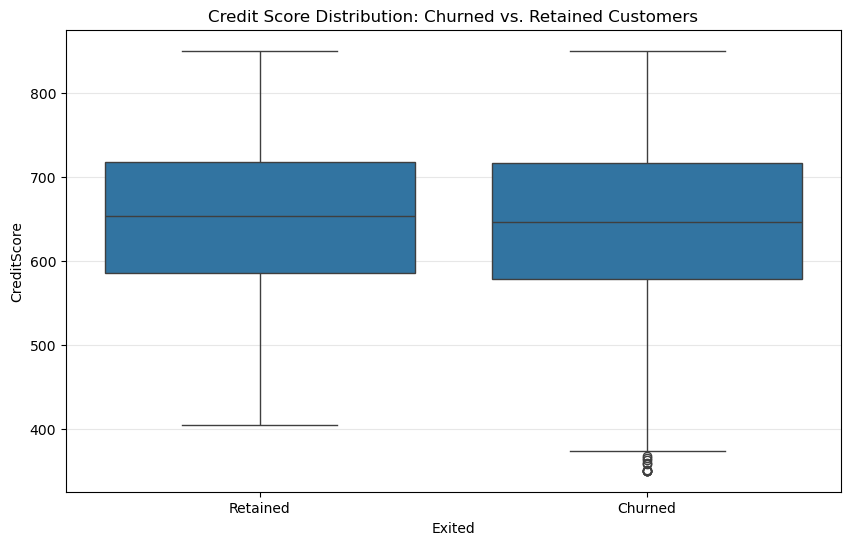

In [8]:
# Churn customer vs Retained customer credit score
churn_data = customer_ch[['Exited', 'CreditScore']]

# Visualisation of the Churn_data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=churn_data)
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.title("Credit Score Distribution: Churned vs. Retained Customers")
plt.grid(axis='y', alpha=0.3) 
plt.show()

## Credit Score Distribution: Churned vs. Retained Customers  

- The **median credit score** for churned and retained customers is similar, suggesting **credit score alone may not be a strong predictor of churn**.  
- The **distribution of credit scores** is nearly identical for both groups, indicating minimal variance in credit scores between churned and retained customers.  
- There are **outliers in the churned category**, with some customers having **very low credit scores (<400)**, which might indicate a higher likelihood of churn for customers with extremely low scores.  
- Further analysis is needed with other factors like **Age, Geography, or Number of Products** to identify stronger churn indicators.  


## Checking if high balance customers are more likely to leave.

In [9]:
## Checking if high balance customer are likely to be among the churned
hb_ch = customer_ch[customer_ch['Exited'] == 1].sort_values(by = 'Balance', ascending = False).head(5)
hb_re = customer_ch[customer_ch['Exited'] == 0].sort_values(by = 'Balance', ascending = False).head(5)

# Adding a new column 
hb_ch['Status'] = 'Churned'
hb_re['Status'] = 'Retained'

# Combining both dataframe
combine_data = pd.concat([hb_ch, hb_re])
print(combine_data[['Balance', 'Exited', 'Status']])

# A descriptive output to see the per
customer_ch.groupby('Exited')['Balance'].describe()

        Balance  Exited    Status
2096  250898.09       1   Churned
3284  238387.56       1   Churned
8738  222267.63       1   Churned
6721  216109.88       1   Churned
138   213146.20       1   Churned
3592  221532.80       0  Retained
1070  214346.96       0  Retained
1537  212778.20       0  Retained
3924  212696.32       0  Retained
2713  212692.97       0  Retained


,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7962.0,72742.750663,62851.577108,0.0,0.0000,92063.06,126419.3300,221532.80
1,2038.0,91109.476006,58346.483197,0.0,38591.2225,109344.23,131423.6375,250898.09


## Customers with the Highest Balances Tend to Churn

Although only **20%** of customers have **churned**, the data indicates that **high-value customers are more likely to leave**. The table above shows that the **25th, 50th (median), and 75th percentiles** of the **balance distribution for churned customers are higher than those of retained customers**. This suggests that customers with **higher account balances may be at greater risk of leaving**.

## Explore how Satisfaction Score relates to churn.

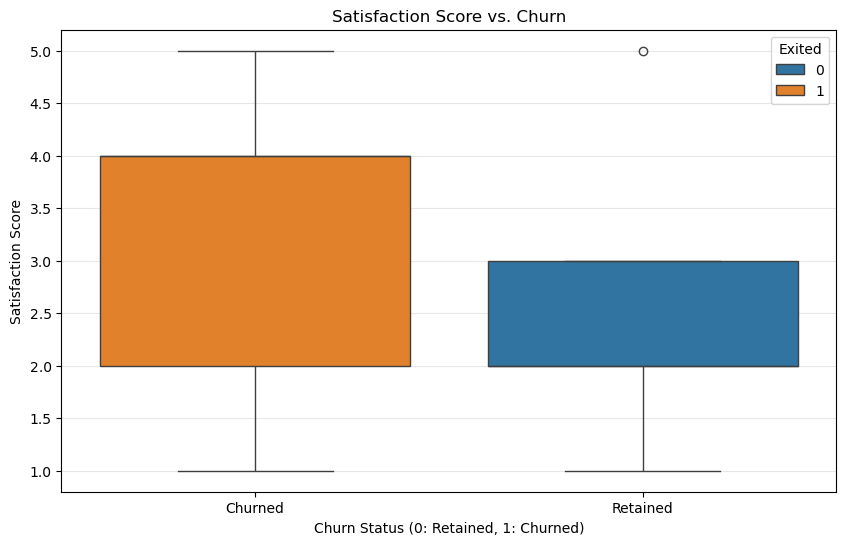

T-statistic: 0.6000000000000001
P-value: 0.5651100578742182


In [10]:
# Satisfaction Score relates to Churn
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Status', y = 'Satisfaction Score', hue = 'Exited', data = combine_data)
plt.title('Satisfaction Score vs. Churn')
plt.xlabel('Churn Status (0: Retained, 1: Churned)')
plt.ylabel('Satisfaction Score')
plt.grid(axis='y', alpha=0.3) 
plt.show()

# Statistical Test (assuming 'Exited' is 0 for Retained, 1 for Churned)
churned_satisfaction = combine_data[combine_data['Exited'] == 1]['Satisfaction Score']
retained_satisfaction = combine_data[combine_data['Exited'] == 0]['Satisfaction Score']

t_statistic, p_value = ttest_ind(churned_satisfaction, retained_satisfaction)  # Or mannwhitneyu()
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

## Satisfaction Score vs. Churn Analysis

This analysis explores the relationship between customer satisfaction score and churn.

**Visualization:**

A box plot visualizes the distribution of satisfaction scores for churned and retained customers.  Churned customers appear to have a slightly lower median satisfaction score and potentially more variability.


**Statistical Test (T-test):**

An independent samples t-test was performed to assess the statistical significance of the difference in mean satisfaction scores between the two groups.

* **T-statistic:** 0.60
* **P-value:** 0.565

**Findings:**

The p-value (0.565) is greater than 0.05, indicating that the difference in satisfaction scores between churned and retained customers is *not* statistically significant.  This suggests a weak or non-existent relationship between satisfaction and churn in this dataset.

**Conclusion:**

While the box plot hinted at a possible trend, the t-test results indicate that satisfaction score alone might not be a strong predictor of churn. Further investigation of other factors and more complex modeling techniques are recommended.

# Visualization
### Use a bar chart to show churn rate by country (Geography).


Status    Geography
Churned   Germany       814
          France        811
          Spain         413
Retained  France       4203
          Spain        2064
          Germany      1695
Name: count, dtype: int64


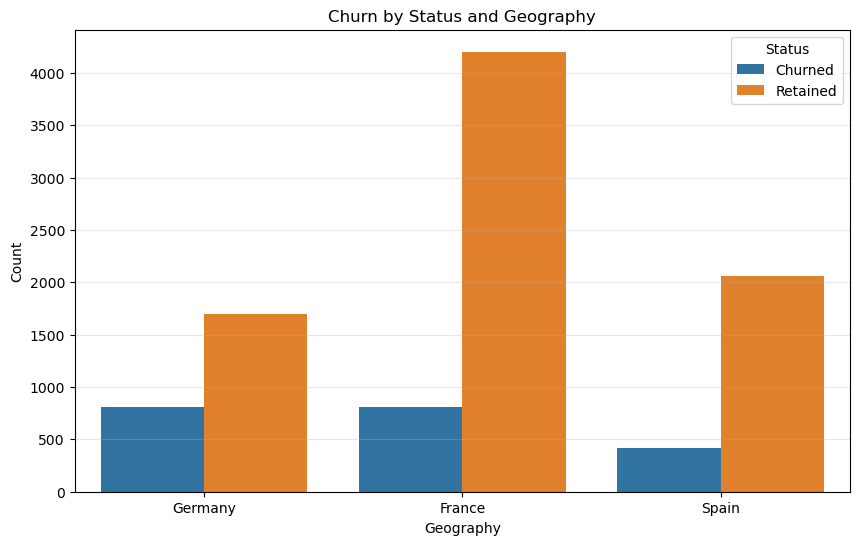

In [11]:
# Sorting the data for visualization
v_ch = customer_ch[customer_ch['Exited'] == 1].sort_values(by = 'Balance', ascending = False)
v_re = customer_ch[customer_ch['Exited'] == 0].sort_values(by = 'Balance', ascending = False)

# Adding a new column 
v_ch['Status'] = 'Churned'
v_re['Status'] = 'Retained'

# Combining both dataframe
v_data = pd.concat([v_ch, v_re])

# Putting the V_data into a DataFrame
v_data = pd.DataFrame(v_data)


# Finding the Bar chart to show churn rate by country (Geography)
v = v_data.groupby('Status')['Geography'].value_counts()
print(v)

# visualizing the output using the barplot
v_reset = v.reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(data = v_reset, x = 'Geography', y = 'count', hue = 'Status')
plt.title('Churn by Status and Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3) 
plt.show()

For the churned data, **Germany** has **814** churned customers, slightly more than **France**, which has **811**. **Spain** has just **413**, making it the lowest among the three.

However, when looking at the **retained customers**, **France** leads significantly with **4,203** retained customers. **Spain** follows with **2,064**, while **Germany** retains only **1,695**, which is approximately **82%** of Spain’s retained count.



## Create a histogram of CreditScore for churned vs. non-churned customers.

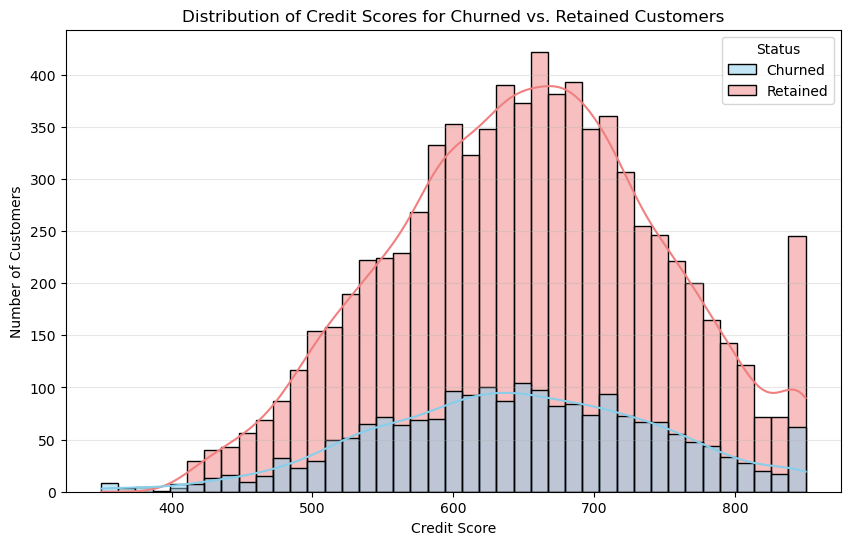

In [12]:
# Plotting with seaborn's histplot (recommended for this task)
plt.figure(figsize=(10, 6))
sns.histplot(data=v_data, x = 'CreditScore', hue = 'Status', kde = True, palette = {'Churned': 'skyblue', 'Retained': 'lightcoral'})
plt.title('Distribution of Credit Scores for Churned vs. Retained Customers')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.3)  # Add a subtle grid for better readability
plt.show()

## Analysis of Customer Churn vs. Credit Score

This visualization explores the relationship between customer churn (leaving the service) and credit scores.  Here's a summary of the key findings:

**Key Observations:**

* **Higher Credit Scores and Churn:** A noticeable trend shows that customers with higher credit scores (particularly in the 600-800 range) are more likely to churn.  The distribution for churned customers is skewed towards this higher range.
* **Retained Customers in the Mid-Range:**  Retained customers are more concentrated in the mid-range of credit scores (roughly 500-700).
* **Bimodal Distribution for Retained Customers:** The distribution of retained customers appears somewhat bimodal, with peaks around 500-600 and 700-800. This could suggest distinct segments within the retained customer base.
* **Low Credit Scores and Retention:**  Customers with credit scores below 500 are significantly less likely to churn.
* **High Credit Scores Don't Guarantee Retention:** While higher credit scores are associated with churn, a substantial number of retained customers also have high credit scores.  This implies other factors are influencing churn beyond just credit score.


## Show a scatter plot of Age vs. EstimatedSalary to see if there’s a pattern.

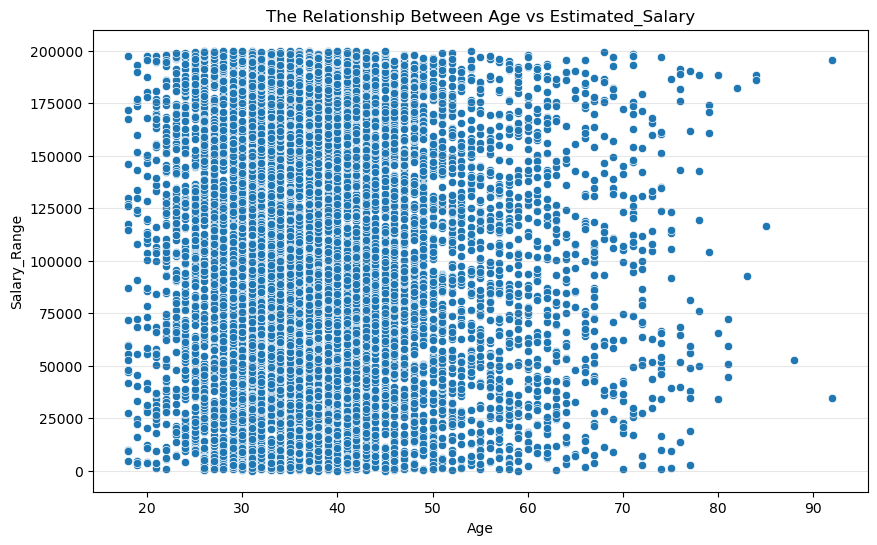

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = v_data, x = 'Age', y = 'EstimatedSalary')
plt.title('The Relationship Between Age vs Estimated_Salary')
plt.xlabel('Age')
plt.ylabel('Salary_Range')
plt.grid(axis='y', alpha=0.3) 
plt.show()

# Scatter Plot Analysis: Age vs. Estimated Salary  

## **Objective:**  
To visualize the relationship between **Age** and **EstimatedSalary** and identify any patterns or trends.  

## **Observations:**  
- The salary distribution appears **evenly spread** across different ages.  
- No **clear trend** (such as increasing or decreasing salary with age) is visible.  
- A **dense cluster** of points between ages **30-50**, indicating a majority of customers fall within this age range.  

### **Conclusion:**  
There doesn’t appear to be a **strong correlation** between age and estimated salary.


## Using a box plot to compare Balance between churned and non-churned customers.

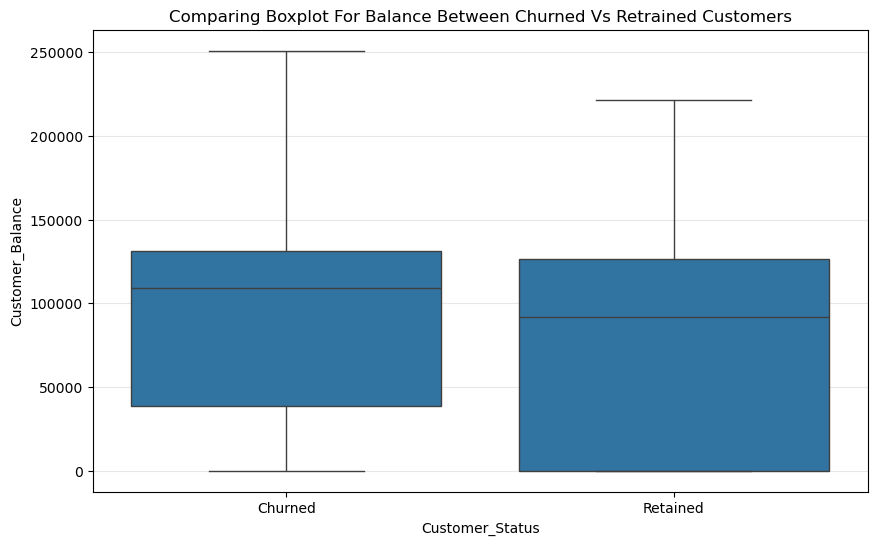

In [14]:
# Visualizing with a box plot to compare balance
plt.figure(figsize = (10,6))
sns.boxplot(data = v_data, x = 'Status', y = 'Balance')
plt.title('Comparing Boxplot For Balance Between Churned Vs Retrained Customers')
plt.xlabel('Customer_Status')
plt.ylabel('Customer_Balance')
plt.grid(axis='y', alpha=0.3) 
plt.show()

## Analysis of Customer Balance by Churn Status

This box plot visualizes the distribution of customer account balances, comparing customers who have churned (left the service) with those who have been retained (remained with the service).

**Key Observations:**

* **Higher Median Balance for Retained Customers:** The median balance for retained customers (the line inside the box) is noticeably higher than the median balance for churned customers. This suggests that, on average, retained customers tend to have more money in their accounts.

* **Greater Balance Variability for Retained Customers:** The interquartile range (IQR), represented by the box length, is larger for retained customers. This indicates that the balance for retained customers is more spread out and variable compared to churned customers.

* **Potential Outliers:** Both groups exhibit potential outliers (individual points plotted outside the "whiskers"). However, given the scale of the y-axis (Customer Balance), it's important to investigate these outliers further to determine if they are truly exceptional cases or simply part of the natural distribution.

* **Overlapping Distributions:**  While there's a difference in medians and variability, the distributions do overlap, suggesting that balance alone is not a perfect predictor of churn.  There are likely other factors influencing churn.


## Finding the top 3 factors affecting churn using correlation.

In [15]:
# Top 3 churn factors
corr_customer = v_data.select_dtypes(include = ['integer', 'float']).corr()
correlation = corr_customer['Exited'].sort_values(ascending = False)
print(correlation)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64


### Complain and Churn: A Strong Relationship

The analysis reveals a very strong positive correlation (0.995693) between "Complain" and "Exited" (churn).  This indicates that customers who file complaints are extremely likely to churn.

**Key Observations:**

*   The correlation is exceptionally high, suggesting that complaining is a strong precursor, if not a direct trigger, for churning.  It's probable that the act of complaining often immediately precedes or coincides with the customer's decision to leave.

**Potential Implications:**

*   **Complaint as a Churn Indicator:**  Complaints should be treated as a serious churn risk signal.  Immediate and effective action is crucial when a customer files a complaint.
*   **Customer Satisfaction Focus:**  The strong link between complaints and churn highlights the importance of customer satisfaction and effective complaint resolution processes.  Addressing issues promptly and satisfactorily could be key to preventing churn.

**Further Investigation:**

*   **Complaint Handling Process:**  Evaluating the effectiveness of the current complaint handling process is essential.  Are complaints being addressed promptly and effectively?  Are customers satisfied with the resolution?
*   **Timing:**  Investigating the *timing* of complaints in relation to churn could be useful.  Do customers complain shortly before churning, or is there a longer period between complaint and exit?

**Integration with Previous Findings:**

While Age and Balance show some relationship with churn, the "Complain" factor appears to be a much stronger and more immediate indicator.  It's crucial to prioritize efforts to address customer complaints effectively to mitigate churn risk.

## Identify which Card Type has the most loyal customers.

In [16]:
v_data.groupby('Status')['Card Type'].value_counts()

Status    Card Type
Churned   DIAMOND       546
          PLATINUM      508
          SILVER        502
          GOLD          482
Retained  GOLD         2020
          SILVER       1994
          PLATINUM     1987
          DIAMOND      1961
Name: count, dtype: int64

## Loyalty Analysis by Card Type
The table above shows the count of customers segmented by their Card Type and Status (Churned vs. Retained). This analysis helps identify which card type has the most loyal customers.

Key Insight:
Among the retained customers, the Gold Card has the highest count (2020), making it the card type with the most loyal customers, closely followed by the Silver Card (1994).
*  **Churned Customers**: Diamond (546), Platinum (508), Silver (502), Gold (482)
*  **Retained Customers**: Gold (2020), Silver (1994), Platinum (1987), Diamond (1961)

# Customer Churn Analysis: Key Findings and Insights

This notebook explores customer churn within a dataset of 10,005 entries and 18 variables.  The analysis covers data cleaning, exploratory data analysis (EDA), and the identification of key churn drivers.

## Data Overview and Cleaning

* The dataset contained 10,005 records with no missing values, but 5 duplicates were identified and removed.
* Data types were a mix of numerical (int64, float64) and categorical (object).
* The `CustomerId` column was treated as an object type.

## Overall Churn Rate

The overall churn rate in the dataset is 20.38% (2,038 customers).

## Key Churn Drivers and Insights

### 1. Demographics and Geography

* **Geography:** Germany exhibits the highest number of churned customers (814), slightly more than France (811), while Spain has the lowest (413). However, when considering retained customers, France leads significantly, followed by Spain and then Germany.  This suggests a deeper dive into regional factors is warranted.
* **Gender:** Female customers have a higher churn rate than male customers.
* **Age:** Older customers tend to have a higher churn rate.

### 2. Credit Score

* The median credit score is similar for churned and retained customers, indicating that credit score alone is not a strong predictor of churn.
* While the overall distribution of credit scores is nearly identical for both groups, there are outliers in the churned category with very low credit scores (<400), suggesting this extreme could be a risk factor.

### 3. Account Balance

* Customers with higher account balances are more likely to churn. The 25th, 50th, and 75th percentiles of the balance distribution are all higher for churned customers.  This suggests high-value customers are at greater risk.

### 4. Satisfaction Score

* While a box plot hinted at lower satisfaction scores for churned customers, a t-test (t-statistic = 0.60, p-value = 0.565) revealed no statistically significant difference in mean satisfaction scores between the two groups.  This indicates that satisfaction, *by itself*, may not be a strong churn predictor in this dataset.

### 5. Complaints

* A very strong positive correlation (0.996) exists between complaints and churn. Customers who file complaints are extremely likely to churn. This suggests that complaints are a critical, immediate churn risk signal.  Addressing complaints effectively is crucial for retention.

### 6. Card Type

* Among retained customers, Gold card holders have the highest count (2020), followed closely by Silver card holders (1994). This suggests that Gold and Silver card members are the most loyal customer segments.  However, churn rates among card types should be further investigated to draw more definitive conclusions.

## Summary

This analysis identified several factors associated with customer churn, including higher balance, complaints, and potentially age. While some factors like credit score and (independently) satisfaction score did not show a statistically significant relationship with churn, they warrant further investigation in conjunction with other variables.  The strong link between complaints and churn highlights the need for effective complaint resolution processes.


Thanks For Reading!!